### Project to perform exploratory data analysis using Python on English Premiere leage 2020-21 datasets to analyze, visualize and draw insights with Python libraries and function

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
epl_df = pd.read_csv('/content/EPL_20_21.csv')

In [3]:
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [4]:
# get info
epl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   532 non-null    object 
 1   Club                   532 non-null    object 
 2   Nationality            532 non-null    object 
 3   Position               532 non-null    object 
 4   Age                    532 non-null    int64  
 5   Matches                532 non-null    int64  
 6   Starts                 532 non-null    int64  
 7   Mins                   532 non-null    int64  
 8   Goals                  532 non-null    int64  
 9   Assists                532 non-null    int64  
 10  Passes_Attempted       532 non-null    int64  
 11  Perc_Passes_Completed  532 non-null    float64
 12  Penalty_Goals          532 non-null    int64  
 13  Penalty_Attempted      532 non-null    int64  
 14  xG                     532 non-null    float64
 15  xA    

In [5]:
epl_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,532.0,25.500000,4.319404,16.0,22.00,26.00,29.000,38.00
Matches,532.0,19.535714,11.840459,1.0,9.00,21.00,30.000,38.00
Starts,532.0,15.714286,11.921161,0.0,4.00,15.00,27.000,38.00
Mins,532.0,1411.443609,1043.171856,1.0,426.00,1345.00,2303.500,3420.00
Goals,532.0,1.853383,3.338009,0.0,0.00,1.00,2.000,23.00
Assists,532.0,1.287594,2.095191,0.0,0.00,0.00,2.000,14.00
Passes_Attempted,532.0,717.750000,631.372522,0.0,171.50,573.50,1129.500,3214.00
Perc_Passes_Completed,532.0,77.823872,13.011631,-1.0,73.50,79.20,84.625,100.00
Penalty_Goals,532.0,0.191729,0.850881,0.0,0.00,0.00,0.000,9.00
Penalty_Attempted,532.0,0.234962,0.975818,0.0,0.00,0.00,0.000,10.00


In [6]:
# check NULL value
epl_df.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [7]:
# create 2 new columns
# minutes per match, goal per match

epl_df['MinsPerMatch'] = (epl_df['Mins']/ epl_df['Matches']).astype(int)
epl_df['GoalPerMatch'] = (epl_df['Goals']/ epl_df['Matches']).astype(float)
epl_df.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalPerMatch
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0,80,0.166667
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0,88,0.000000
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0,84,0.111111
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0,74,0.031250


In [8]:
# Total Goals
Total_goals = epl_df['Goals'].sum()
Total_goals

986

In [9]:
# Penalty Goals
Total_Pk_Goals = epl_df['Penalty_Goals'].sum()
Total_Pk_Goals

102

In [10]:
# Penalty Attempt
Total_Pk_Attempts = epl_df['Penalty_Attempted'].sum()
Total_Pk_Attempts

125

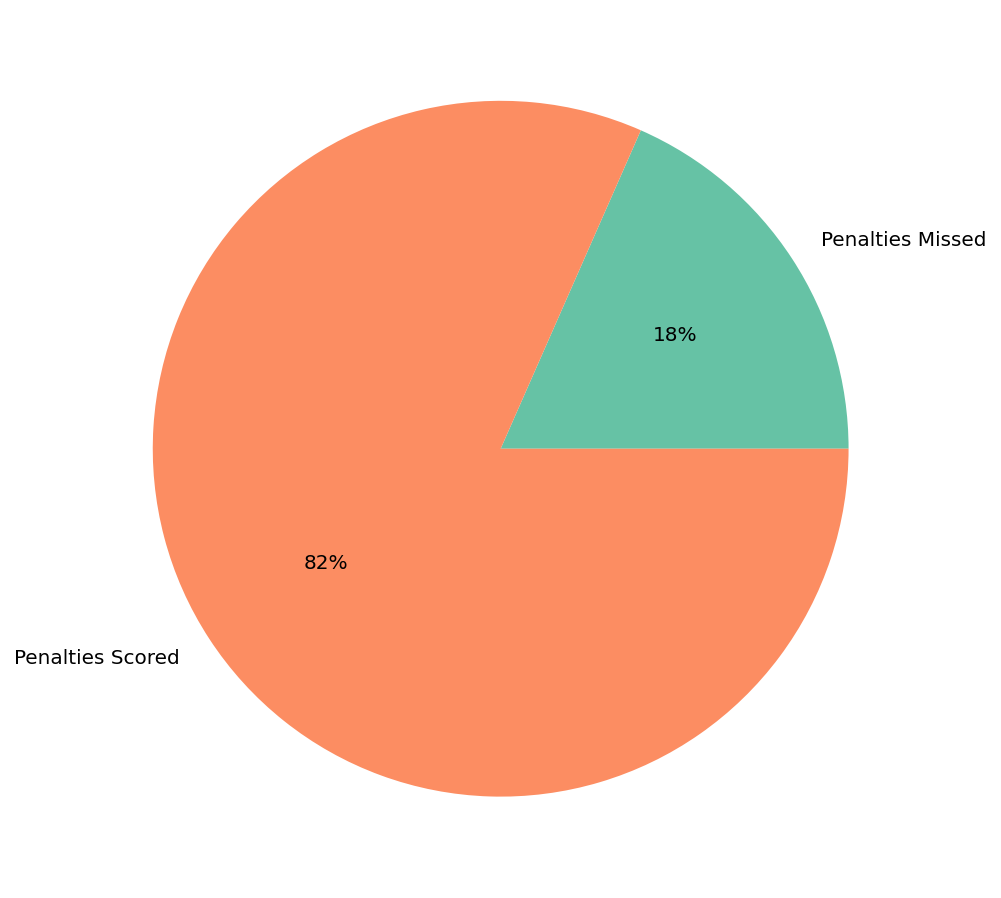

In [11]:
# Pie chart for PK Scored vs PK Missed
plt.figure(figsize=(15,8)) 
Pk_Missed = epl_df['Penalty_Attempted'].sum() - Total_Pk_Goals

# define data of pie chart
data = [Pk_Missed, Total_Pk_Goals]
# define labels
labels = ['Penalties Missed','Penalties Scored']
# define colors
color = sns.color_palette('Set2')

# plot pie chart
plt.pie(data, labels = labels, colors = color, autopct = "%.0f%%")
plt.show()

In [12]:
# Unique Position
epl_df['Position'].unique()

array(['MF,FW', 'GK', 'FW', 'DF', 'MF', 'FW,MF', 'FW,DF', 'DF,MF',
       'MF,DF', 'DF,FW'], dtype=object)

In [13]:
# Total FW Players
epl_df[epl_df['Position']== 'FW']

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards,MinsPerMatch,GoalPerMatch
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0,74,0.171429
16,Tammy Abraham,Chelsea,ENG,FW,22,22,12,1040,6,1,218,68.3,0,0,0.56,0.07,0,0,47,0.272727
19,Olivier Giroud,Chelsea,FRA,FW,33,17,8,748,4,0,217,74.2,0,0,0.58,0.09,1,0,44,0.235294
23,Ruben Loftus-Cheek,Chelsea,ENG,FW,24,1,1,60,0,0,16,68.8,0,0,0.00,0.00,0,0,60,0.000000
30,Raheem Sterling,Manchester City,ENG,FW,25,31,28,2536,10,7,1127,85.4,0,1,0.43,0.17,4,0,81,0.322581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516,Oliver Burke,Sheffield United,SCO,FW,23,25,14,1269,1,1,262,70.6,0,0,0.17,0.13,2,0,50,0.040000
518,Oliver McBurnie,Sheffield United,SCO,FW,24,23,12,1324,1,0,426,62.9,0,0,0.21,0.07,2,0,57,0.043478
519,Rhian Brewster,Sheffield United,ENG,FW,20,27,12,1128,0,0,225,69.3,0,0,0.14,0.13,1,0,41,0.000000
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0,45,0.187500


In [14]:
# Players from diffrent nations
np.size((epl_df['Nationality'].unique()))

59

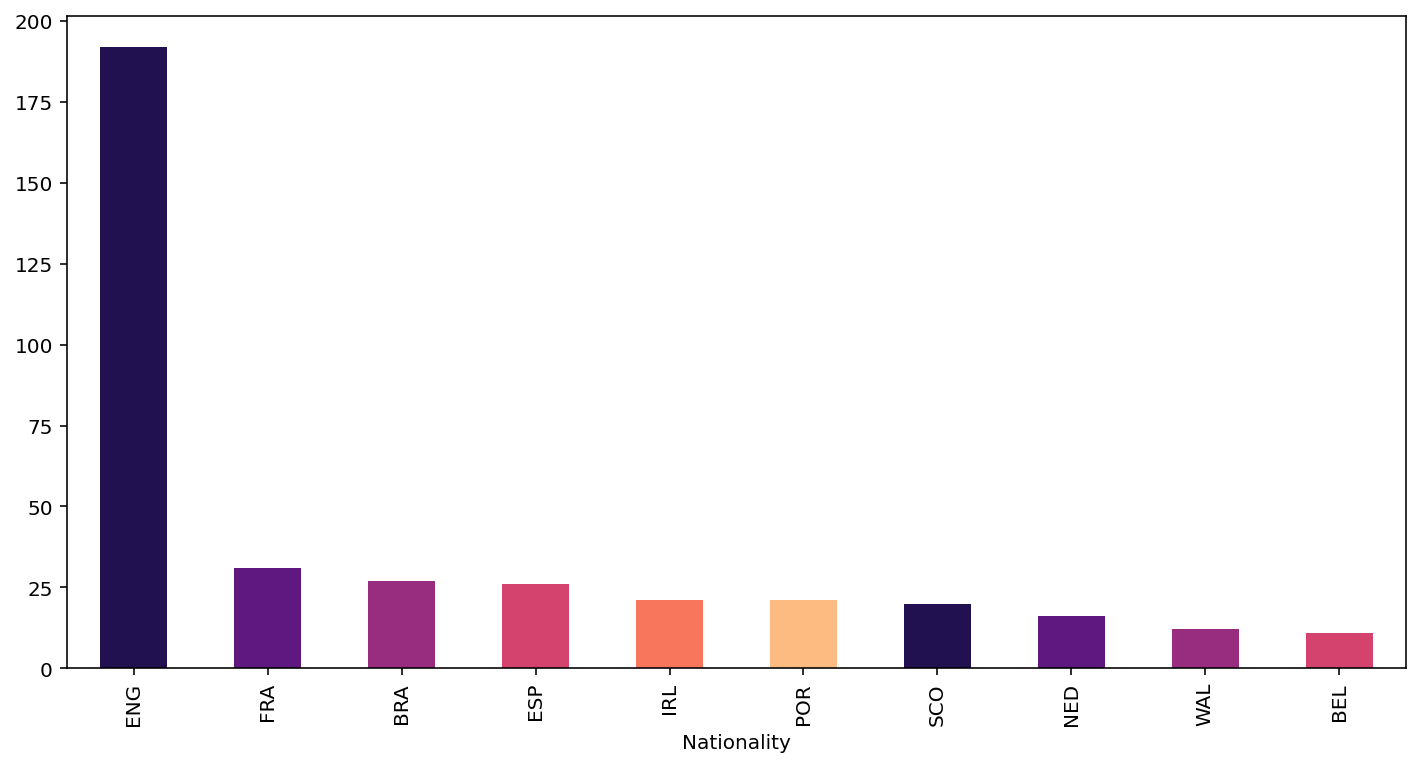

In [15]:
# Most players from which countries
Nationality = epl_df.groupby('Nationality').size().sort_values(ascending = False)
Nationality.head(10).plot(kind= 'bar', figsize = (12,6), color = sns.color_palette('magma'))

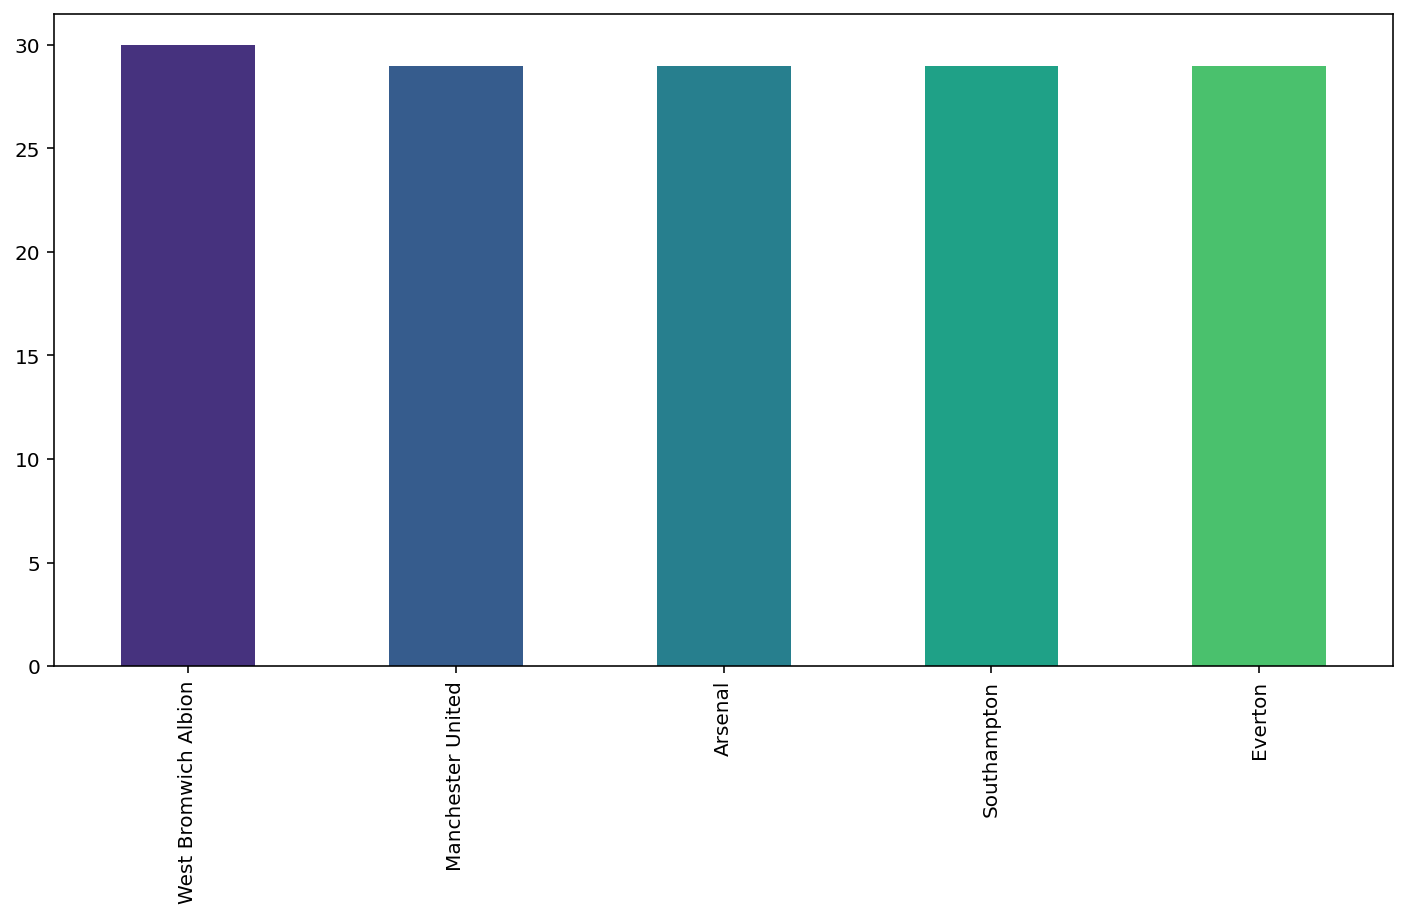

In [16]:
# Clubs with maximum players in their squad
# nlargest(5) to get top 5 
epl_df['Club'].value_counts().nlargest(5).plot(kind= 'bar', figsize = (12,6), color = sns.color_palette('viridis'))

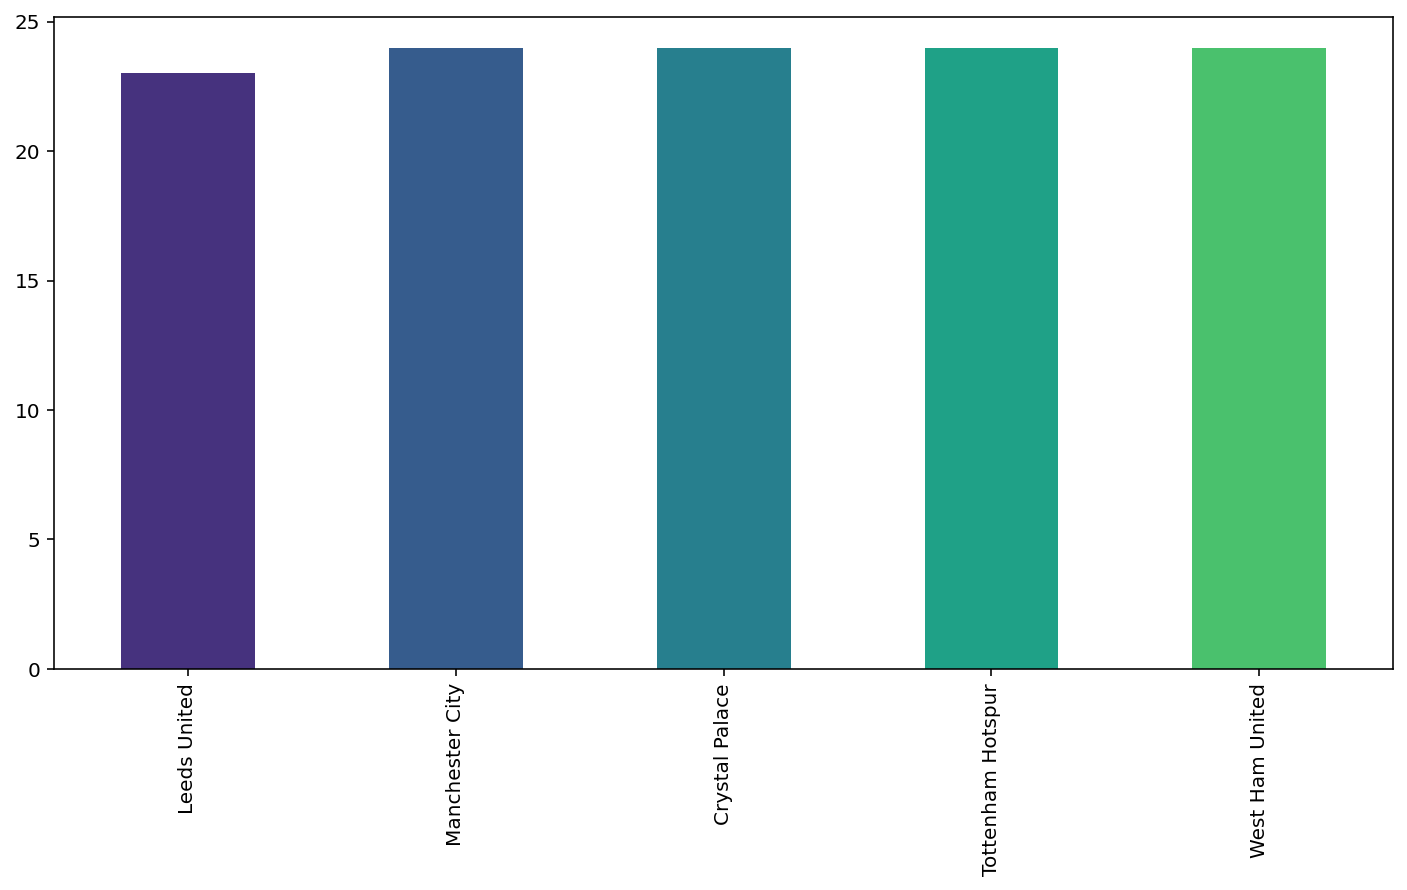

In [17]:
# Clubs with least players in their squad
# nsmallest(5) to get top 5 
epl_df['Club'].value_counts().nsmallest(5).plot(kind= 'bar', figsize = (12,6), color = sns.color_palette('viridis'))

In [18]:
# Players based on age group
U20 = epl_df[epl_df['Age'] < 20]
Age20_25 = epl_df[(epl_df['Age'] > 20) & (epl_df['Age'] <= 25)]
Age25_30 = epl_df[(epl_df['Age'] > 25) & (epl_df['Age'] <= 30)]
Above30 = epl_df[epl_df['Age'] > 30]

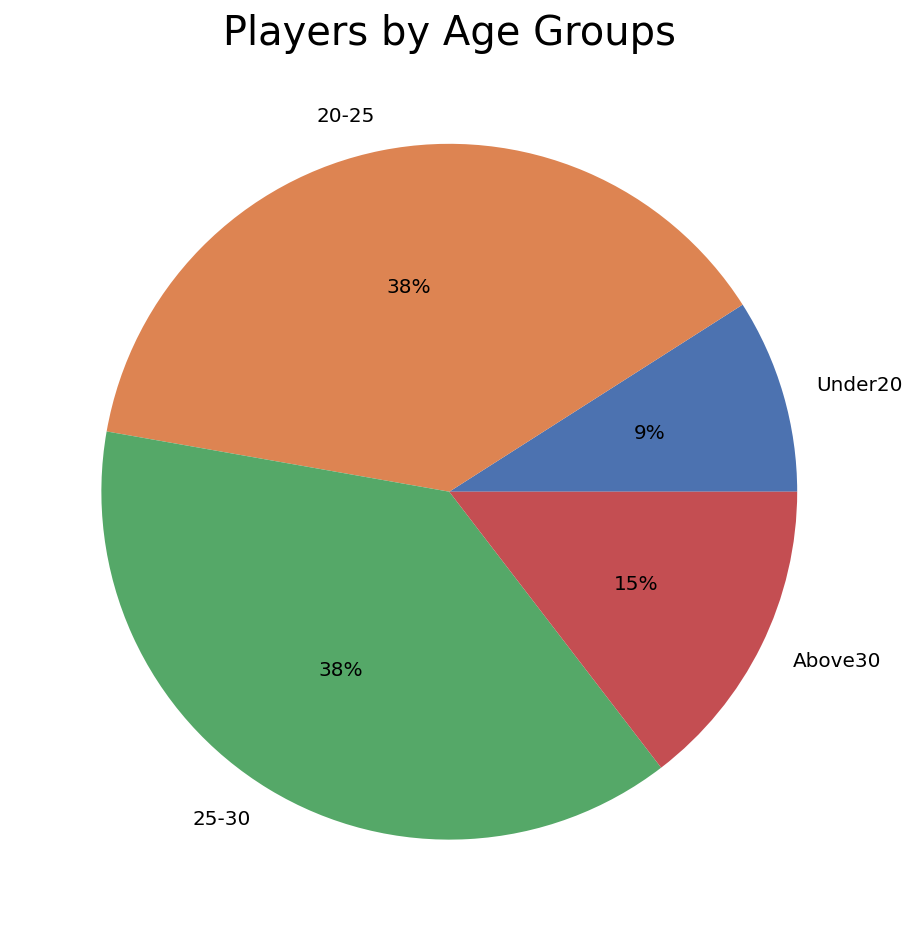

In [19]:
# create numpy array 
plt.figure(figsize=(15,8)) 
x = np.array([U20['Name'].count(),Age20_25['Name'].count(), Age20_25['Name'].count(), Above30['Name'].count()])
Mylabels = ["Under20", "20-25", "25-30", "Above30"]
color = sns.color_palette("deep")
plt.title("Players by Age Groups", fontsize = 20)
plt.pie(x, labels= Mylabels , autopct="%1.f%%",  colors = color)
plt.show()

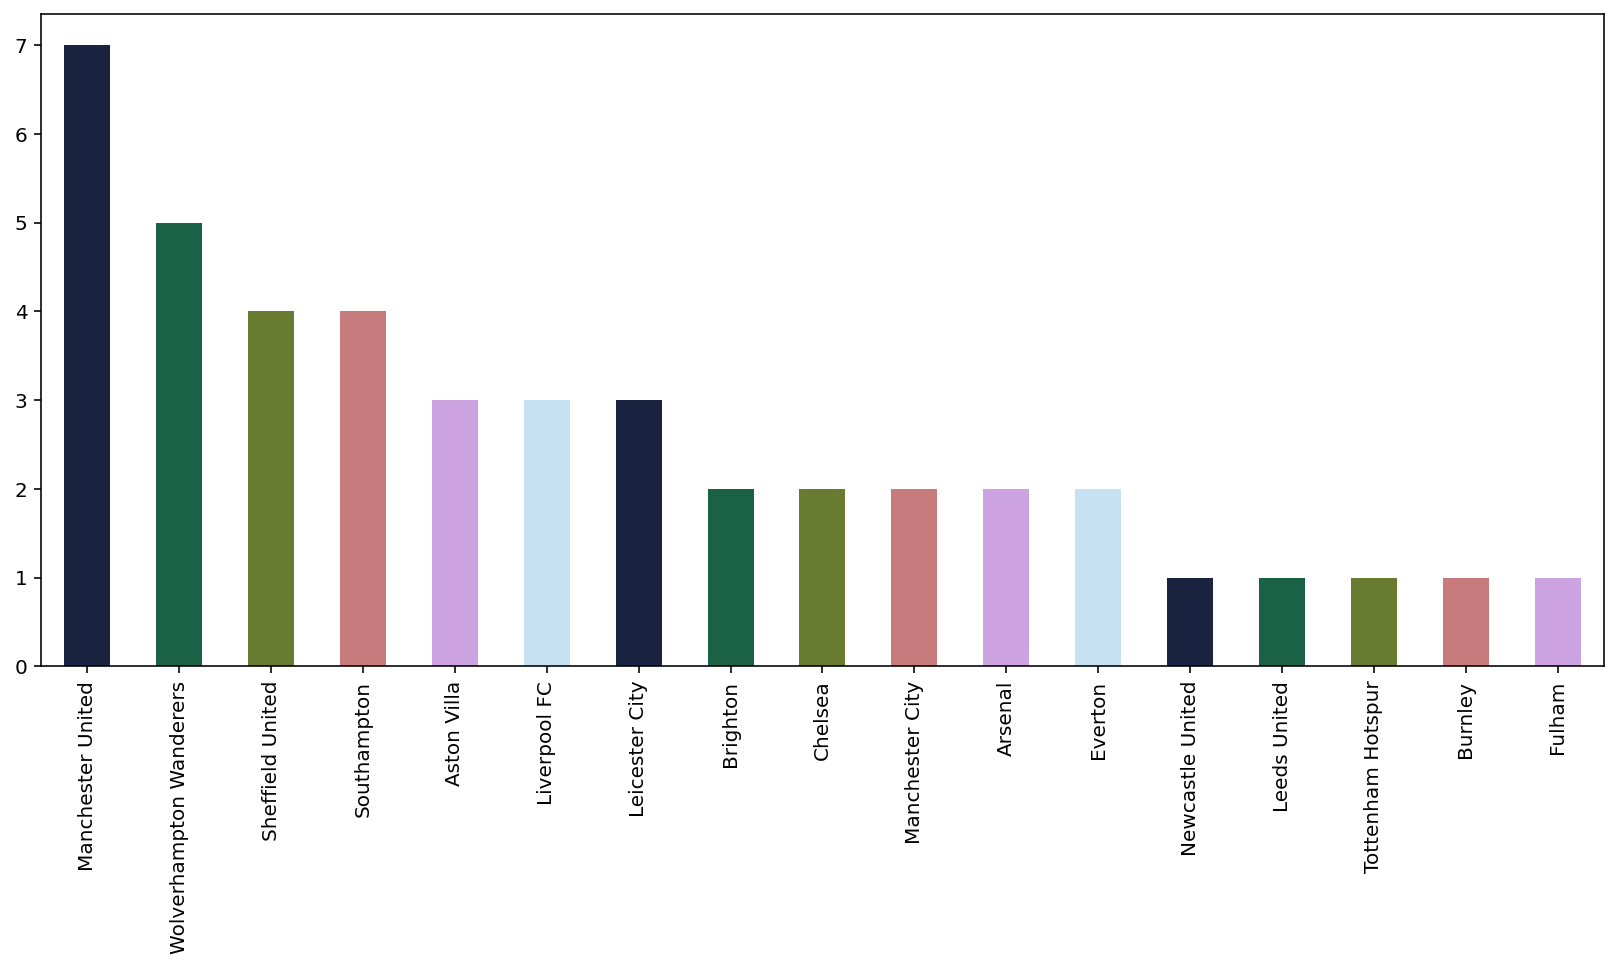

In [25]:
# Players under 20 in each club

Players_U_20 = epl_df[epl_df['Age'] < 20]
plt.figure(figsize=(14,6)) 
Players_U_20['Club'].value_counts().plot(kind= 'bar', color = sns.color_palette('cubehelix'))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

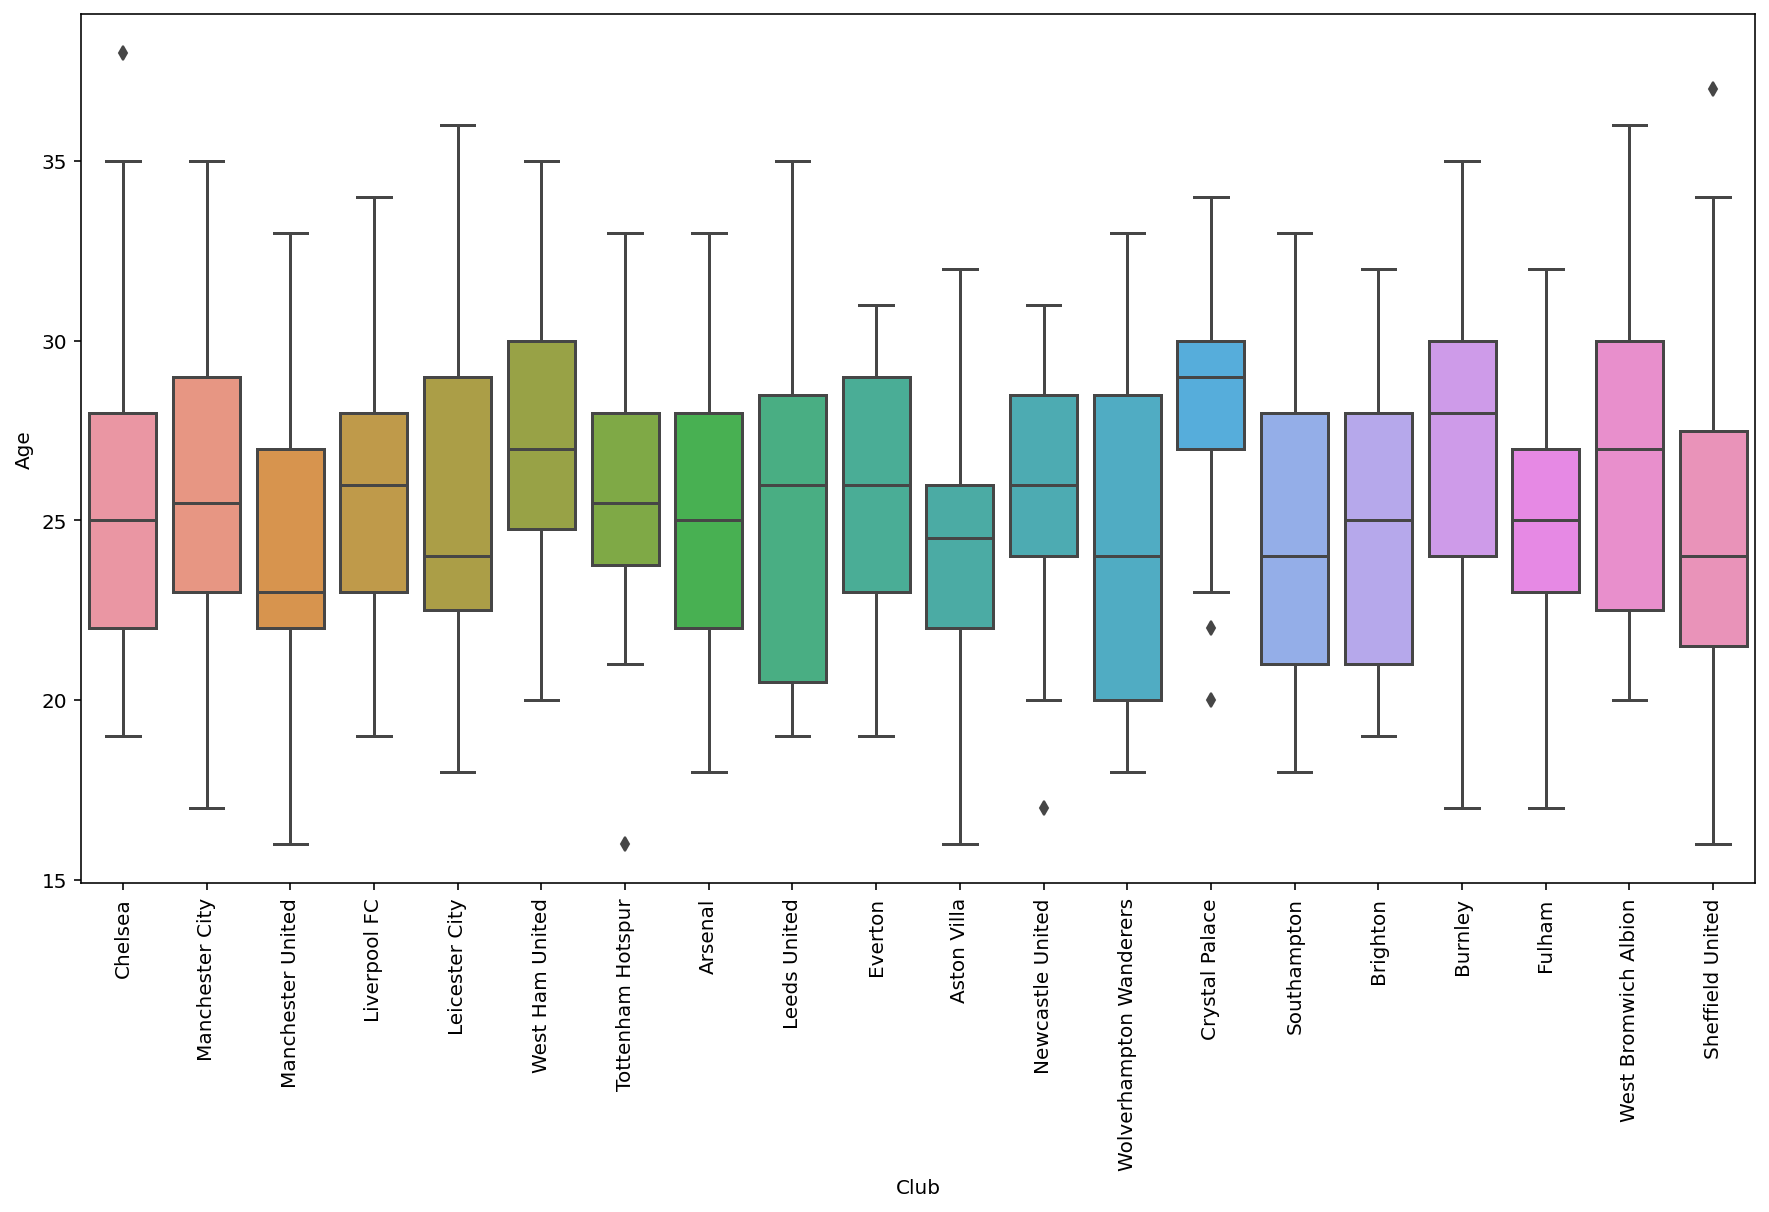

In [21]:
 # Average age of players in each club
plt.figure(figsize=(15,8))
sns.boxplot(x='Club', y = 'Age', data= epl_df)
plt.xticks(rotation=90)

In [22]:
# Find players amount of each club
num_players = epl_df.groupby('Club').size()
num_players

Club
Arsenal                    29
Aston Villa                24
Brighton                   27
Burnley                    25
Chelsea                    27
Crystal Palace             24
Everton                    29
Fulham                     28
Leeds United               23
Leicester City             27
Liverpool FC               28
Manchester City            24
Manchester United          29
Newcastle United           27
Sheffield United           27
Southampton                29
Tottenham Hotspur          24
West Bromwich Albion       30
West Ham United            24
Wolverhampton Wanderers    27
dtype: int64

In [23]:
# Find total of players age of each club
data = (epl_df.groupby('Club')['Age'].sum())
data

Club
Arsenal                    724
Aston Villa                583
Brighton                   663
Burnley                    676
Chelsea                    691
Crystal Palace             680
Everton                    737
Fulham                     701
Leeds United               583
Leicester City             691
Liverpool FC               716
Manchester City            617
Manchester United          692
Newcastle United           704
Sheffield United           670
Southampton                700
Tottenham Hotspur          615
West Bromwich Albion       803
West Ham United            660
Wolverhampton Wanderers    660
Name: Age, dtype: int64

In [24]:
# Find the age average of each club  
num_players = epl_df.groupby('Club').size()
data = (epl_df.groupby('Club')['Age'].sum()) / num_players 
data.sort_values(ascending=False)

Club
Crystal Palace             28.333333
West Ham United            27.500000
Burnley                    27.040000
West Bromwich Albion       26.766667
Newcastle United           26.074074
Manchester City            25.708333
Tottenham Hotspur          25.625000
Chelsea                    25.592593
Leicester City             25.592593
Liverpool FC               25.571429
Everton                    25.413793
Leeds United               25.347826
Fulham                     25.035714
Arsenal                    24.965517
Sheffield United           24.814815
Brighton                   24.555556
Wolverhampton Wanderers    24.444444
Aston Villa                24.291667
Southampton                24.137931
Manchester United          23.862069
dtype: float64

In [30]:
# Total Goals Assist by Club
# create a dataframe of goals assists by club 
Club_Total_Assist = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Assists'].sum())
Club_Total_Assist

,Club,Assists
0,Arsenal,38
1,Aston Villa,38
2,Brighton,24
3,Burnley,20
4,Chelsea,38
5,Crystal Palace,29
6,Everton,32
7,Fulham,18
8,Leeds United,45
9,Leicester City,45


Text(0.5, 1.0, 'Total Goals Assist by Club')

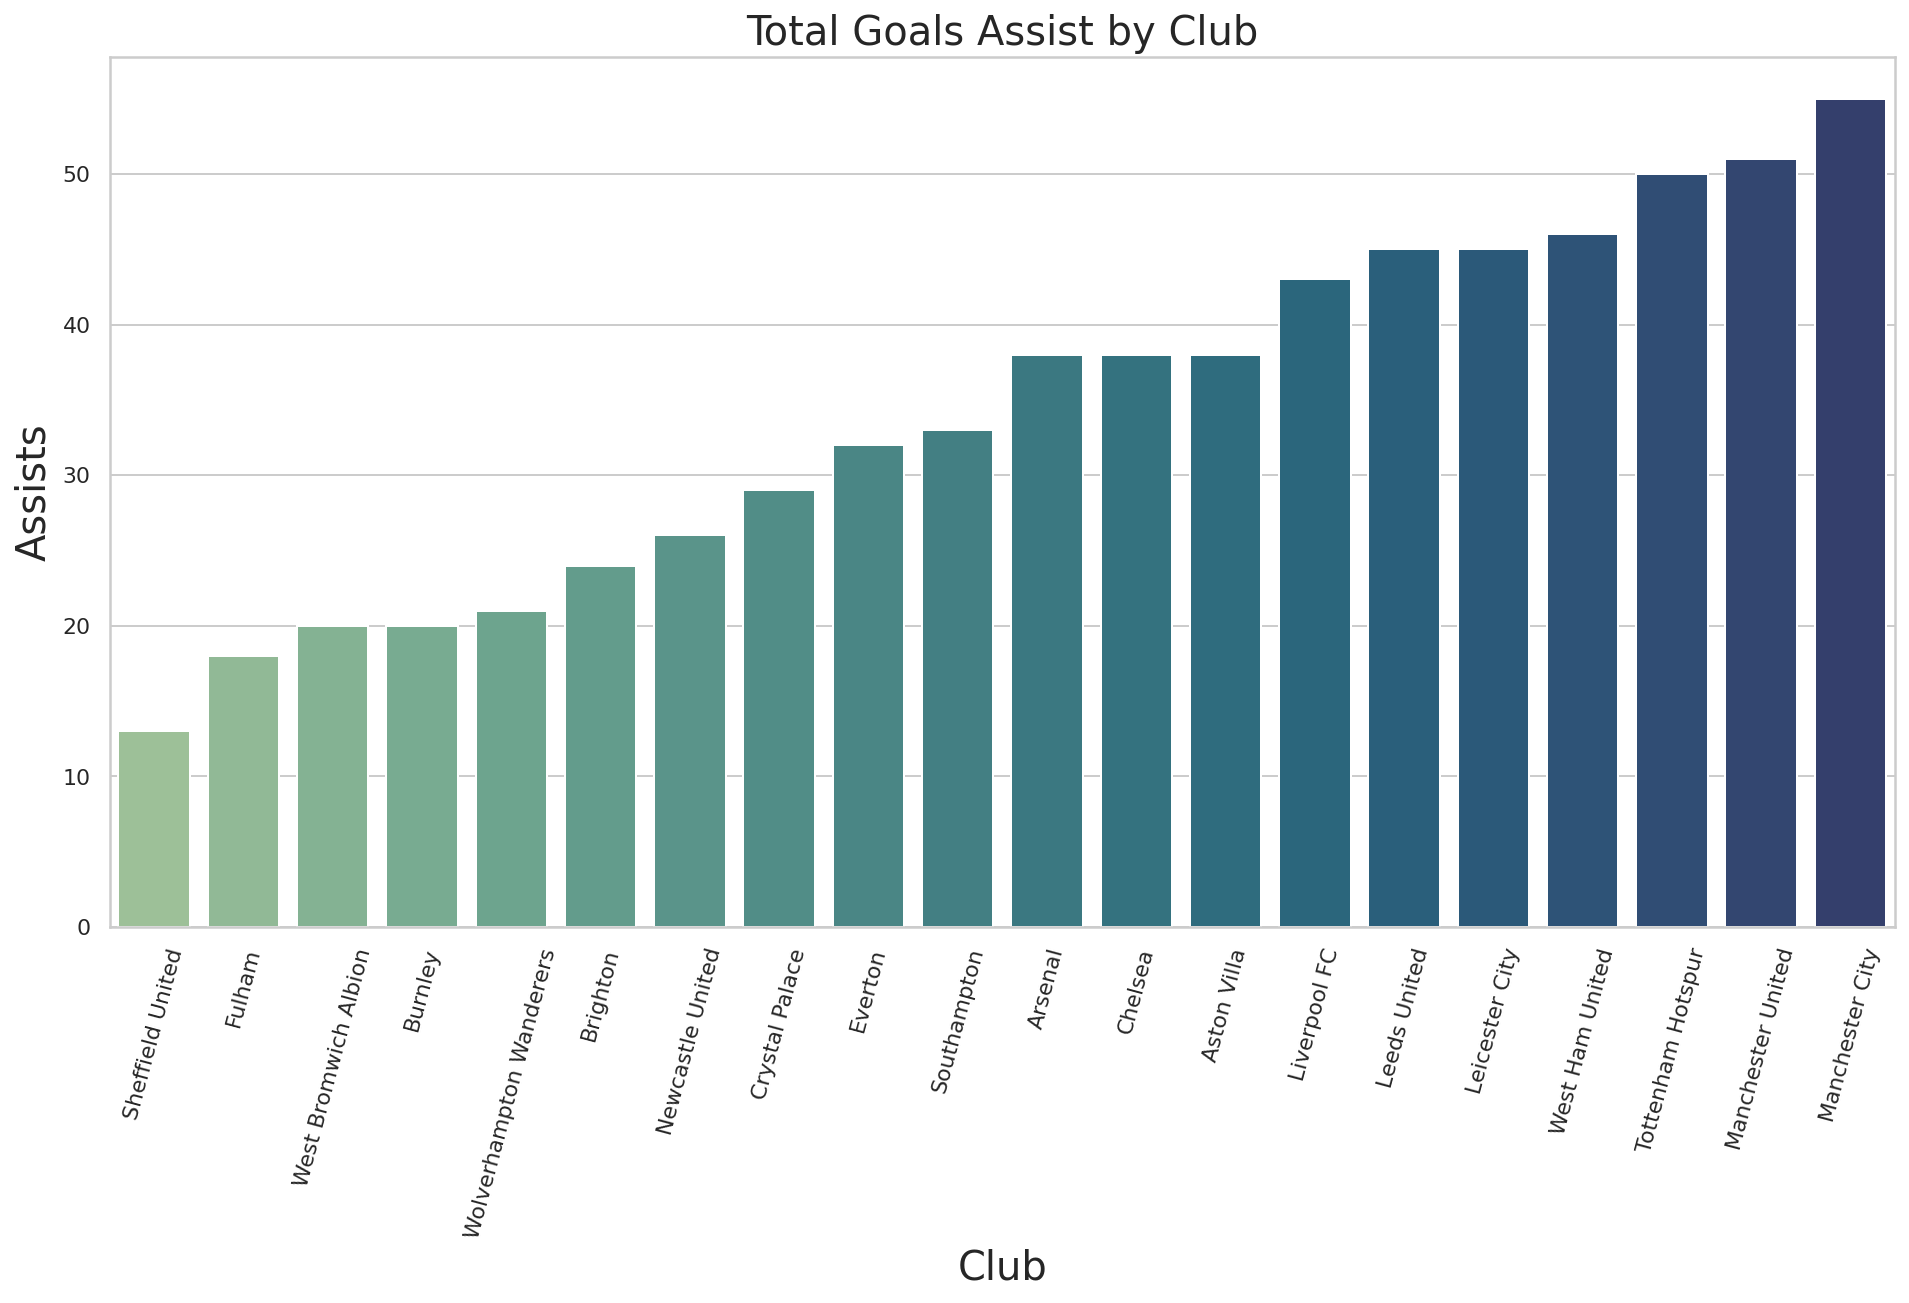

In [57]:
# Plot a bar chart Club Assist
# seaborn theme => sns.set_theme()

sns.set_theme(style='whitegrid', color_codes=True)
# Bar Plot => sns.barplot(x='', y='', data = , palette = )
axis = sns.barplot(x='Club', y='Assists',data = Club_Total_Assist.sort_values(by='Assists'), palette ='crest')
axis.set_xlabel('Club', fontsize=20)
axis.set_ylabel('Assists', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]= (16,8)
plt.title('Total Goals Assist by Club', fontsize=20)

In [61]:
# Top 10 Assists
# Filtering  dataframe for top 10 assists
Top_10_assist = epl_df[['Name','Club','Assists','Matches']].nlargest(n=10, columns = 'Assists')
Top_10_assist

,Name,Club,Assists,Matches
162,Harry Kane,Tottenham Hotspur,14,35
34,Kevin De Bruyne,Manchester City,12,25
51,Bruno Fernandes,Manchester United,12,37
161,Son Heung-min,Tottenham Hotspur,10,37
273,Jack Grealish,Aston Villa,10,26
54,Marcus Rashford,Manchester United,9,37
110,Jamie Vardy,Leicester City,9,34
220,Raphael Dias Belloli,Leeds United,9,30
2,Timo Werner,Chelsea,8,35
136,Aaron Cresswell,West Ham United,8,36


In [62]:
# Total Goals by Club
# create a dataframe of goals  by club 
Club_Total_Goals = pd.DataFrame(epl_df.groupby('Club', as_index=False)['Goals'].sum())
Club_Total_Goals

,Club,Goals
0,Arsenal,53
1,Aston Villa,52
2,Brighton,39
3,Burnley,32
4,Chelsea,56
5,Crystal Palace,39
6,Everton,45
7,Fulham,26
8,Leeds United,60
9,Leicester City,64


Text(0.5, 1.0, 'Total Goals Scored by Club')

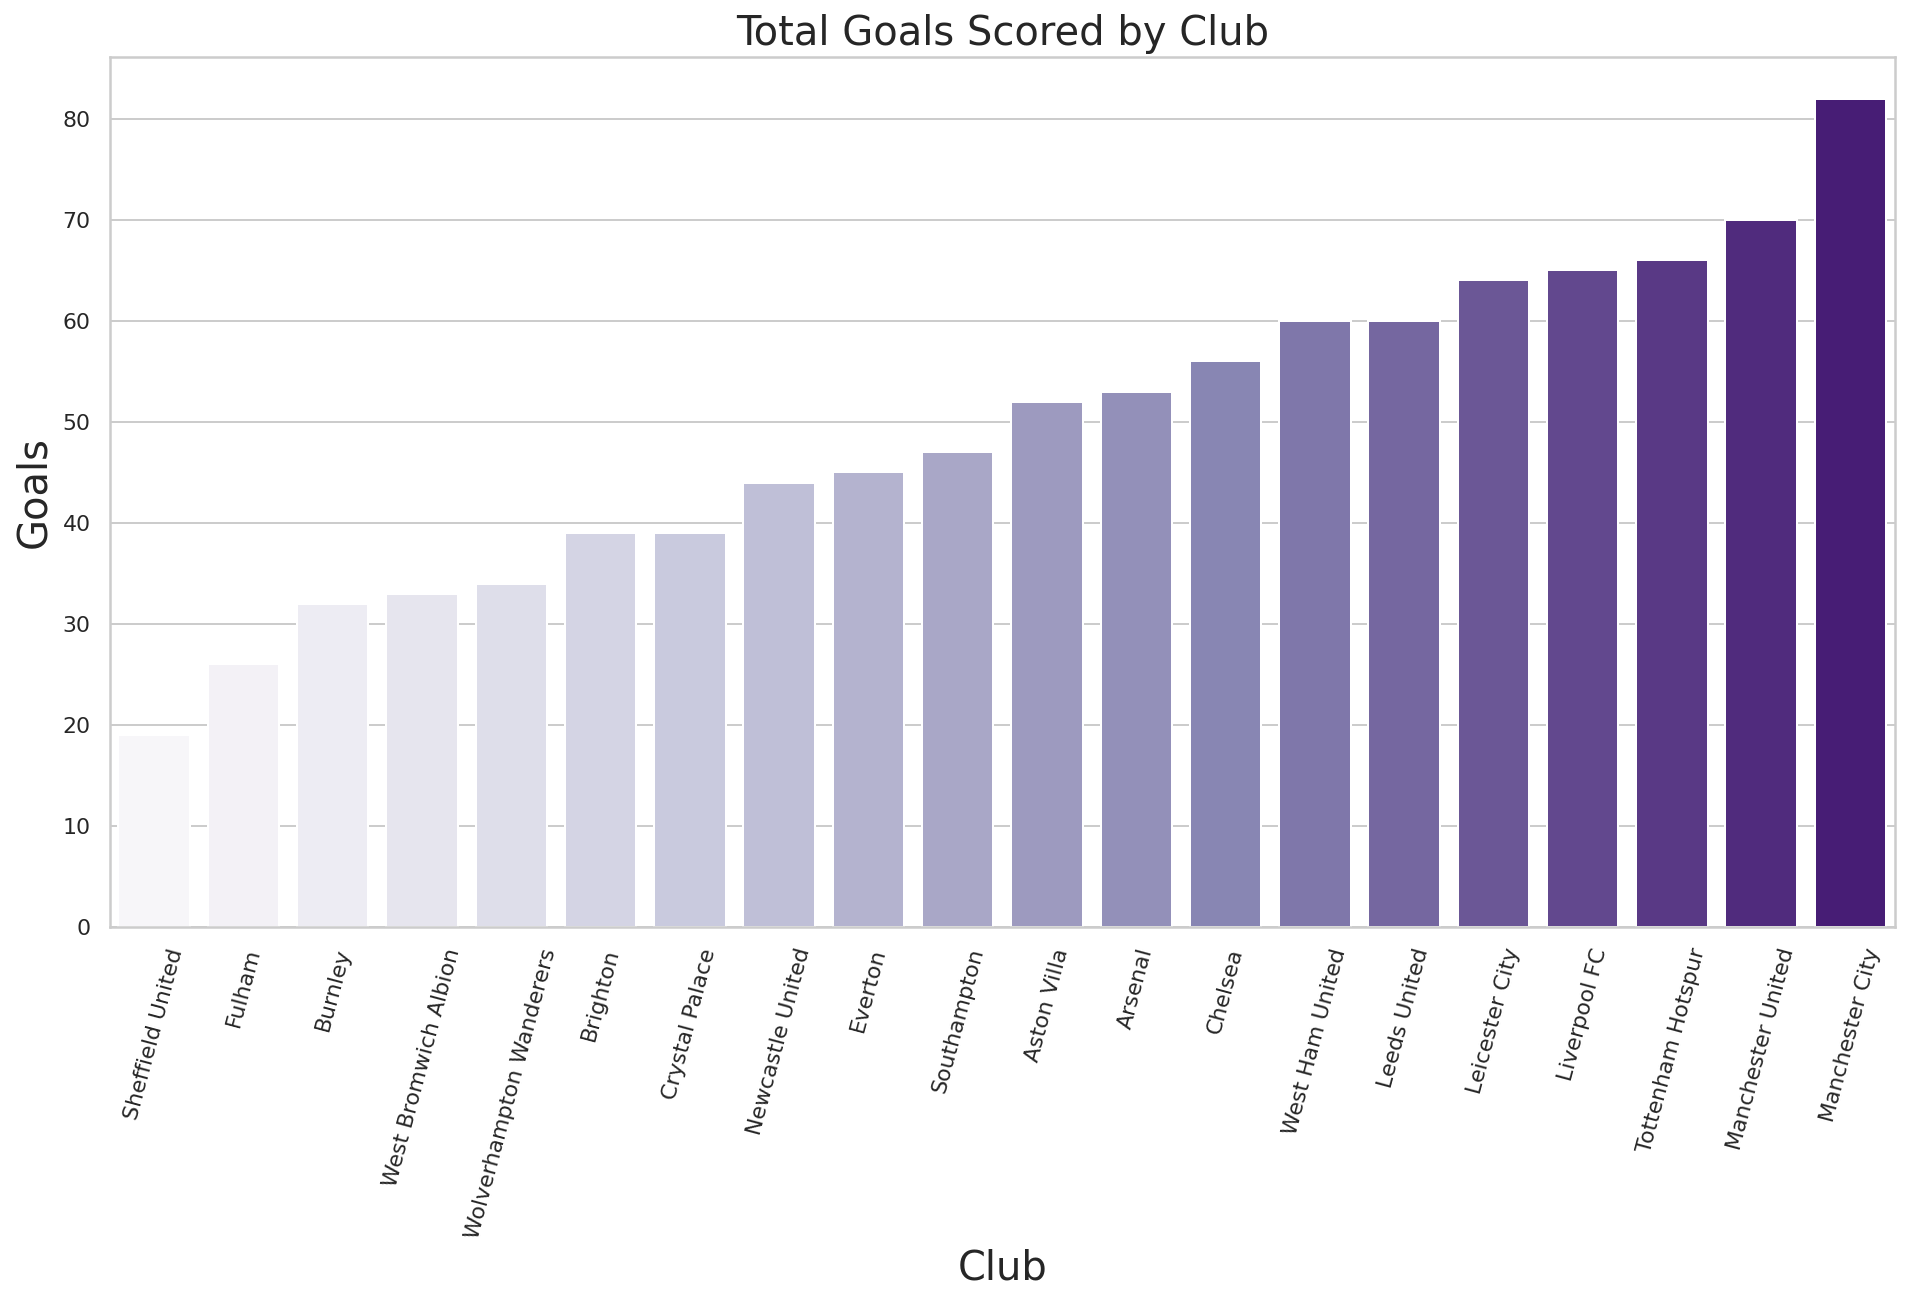

In [84]:
# Plot a bar chart Club goals scored
# seaborn theme => sns.set_theme()

sns.set_theme(style='whitegrid', color_codes=True)
# Bar Plot => sns.barplot(x='', y='', data = , palette = )
axis = sns.barplot(x='Club', y='Goals',data = Club_Total_Goals.sort_values(by='Goals'), palette='Purples')
axis.set_xlabel('Club', fontsize=20)
axis.set_ylabel('Goals', fontsize=20)
plt.xticks(rotation=75)
plt.rcParams["figure.figsize"]= (16,8)
plt.title('Total Goals Scored by Club', fontsize=20)

In [88]:
# Top 10 Scorer
Top_10_Scorer = epl_df[['Name','Club','Goals','Matches']].nlargest(n=10, columns = 'Goals')
Top_10_Scorer

,Name,Club,Goals,Matches
162,Harry Kane,Tottenham Hotspur,23,35
81,Mohamed Salah,Liverpool FC,22,37
51,Bruno Fernandes,Manchester United,18,37
161,Son Heung-min,Tottenham Hotspur,17,37
214,Patrick Bamford,Leeds United,17,38
237,Dominic Calvert-Lewin,Everton,16,33
110,Jamie Vardy,Leicester City,15,34
267,Ollie Watkins,Aston Villa,14,37
33,İlkay Gündoğan,Manchester City,13,28
191,Alexandre Lacazette,Arsenal,13,31


In [90]:
# Goals Per Match
# we have already created => epl_df['GoalPerMatch'] = (epl_df['Goals']/ epl_df['Matches']).astype(float)

Top_Goals_per_Match = epl_df[['Name','GoalPerMatch','Matches','Goals']].nlargest(n=10, columns='GoalPerMatch')
Top_Goals_per_Match



,Name,GoalPerMatch,Matches,Goals
162,Harry Kane,0.657143,35,23
81,Mohamed Salah,0.594595,37,22
307,Joe Willock,0.571429,14,8
145,Jesse Lingard,0.562500,16,9
175,Gareth Bale,0.550000,20,11
74,Anthony Elanga,0.500000,2,1
51,Bruno Fernandes,0.486486,37,18
237,Dominic Calvert-Lewin,0.484848,33,16
120,Kelechi Iheanacho,0.480000,25,12
92,Diogo Jota,0.473684,19,9


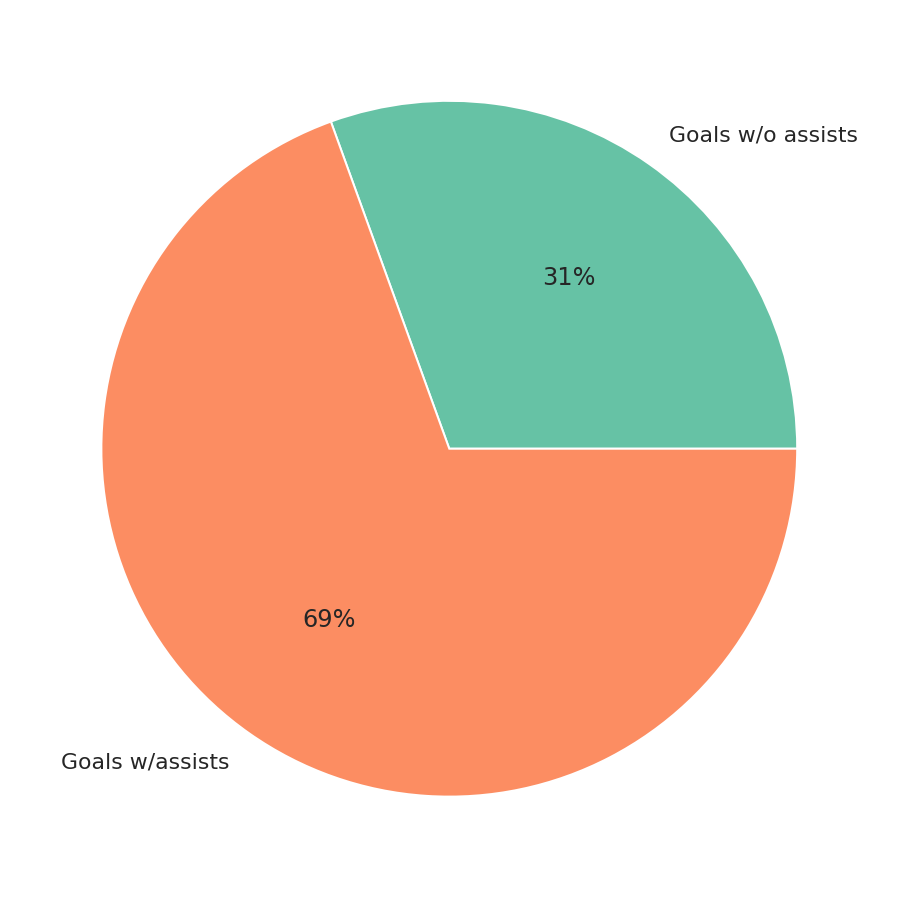

In [99]:
# Pie chart => Goals w/Assists, w/o Assists
plt.figure(figsize=(16,8))
assists = epl_df['Assists'].sum()
data = [Total_goals - assists, assists]
labels = ['Goals w/o assists', 'Goals w/assists']
color = sns.color_palette('Set2')
plt.pie(data, labels = labels, colors= color, autopct='%.0f%%')
plt.show()